<a href="https://colab.research.google.com/github/rhubaiin/FastAI/blob/main/fastai_docs_lesson456_molecule_arshy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai
!pip install -q fastbook
from fastai.vision.all import *
from fastbook import *
from pathlib import Path


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Replace 'YOUR_FOLDER_ID' with the actual folder ID from your Google Drive link
# folder_id = '1Fx6-a8pgs2O7GVWCZVo42iSS2seAWeQ4'

# Define the path to the folder in Colab
# Important, arshy mentions accesing path by root folder, here 'images', inside images will have 2 folders which will be detected by inbuilt fast ai parent_label function
folder_path_colab = f'/content/drive/MyDrive/images'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path_colab):
    os.makedirs(folder_path_colab)

# List the contents of the folder
contents = os.listdir(folder_path_colab)
print(f"Contents of the folder in Colab: {contents}")


Mounted at /content/drive
Contents of the folder in Colab: ['dopamine', 'serotonin']


In [3]:
# get_image_files will get all images from root folder (even if theyre stored in seperate folders inside parent folder)
files = get_image_files(folder_path_colab)
len(files)

40

In [4]:
#Important, arshy mentions accesing path by root folder, here 'images', inside images will have 2 folders which will be detected by inbuilt fast ai parent_label function
label_func = parent_label

In [5]:
label_func(files[-1])

'serotonin'

In [131]:
#Got to source code, to know what function does and what parameters (Either github or ?? at the back of cell)
# https://github.com/fastai/fastai/blob/master/fastai/vision/data.py
#ImageBlock??
# Can see source code for class ImageDataLoaders(DataLoaders) and ImageBlock (for datablock way)
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(800, ResizeMethod.Squish),
                   batch_tfms=aug_transforms(size=800, min_scale=0.75, do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2))
                   #batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
                   #batch_tfms = [*aug_transforms(size=196),Normalize.from_stats(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

In [129]:
dls = dblock.dataloaders(folder_path_colab, bs=8)

In [111]:
dls.vocab

['dopamine', 'serotonin']

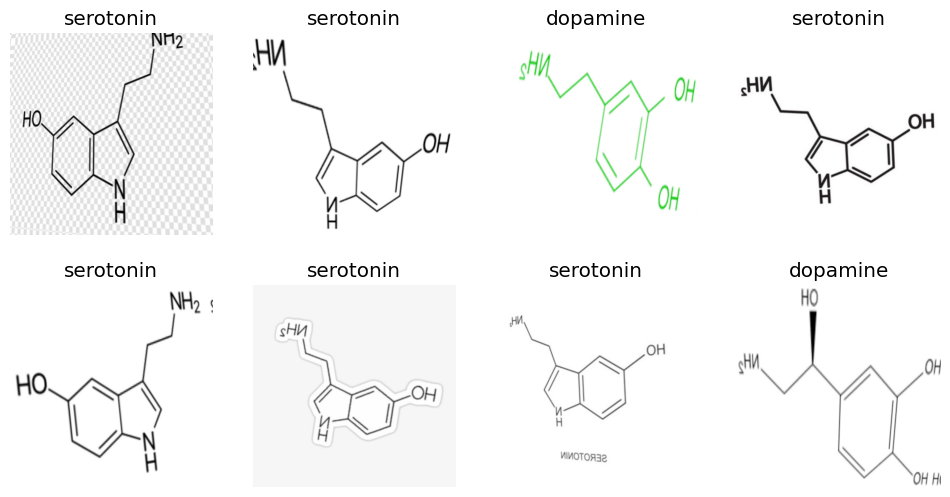

In [132]:
dls.show_batch()

In [133]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [135]:
learn.lr_find()

KeyboardInterrupt: 

In [142]:
learn.fine_tune(14, 0.001, freeze_epochs=4) #freeze only trains the head of the model for epochs, then subsequent epochs trains the entire body and head

epoch,train_loss,valid_loss,error_rate,time
0,0.056516,1.169941,0.250000,00:01
1,0.072626,1.357704,0.375000,00:01
2,0.056707,1.569706,0.375000,00:01
3,0.075799,1.824216,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.009358,1.834407,0.375000,00:01
1,0.006736,1.941950,0.375000,00:01
2,0.008647,2.277518,0.375000,00:01
3,0.006433,2.690168,0.375000,00:01
4,0.043307,2.735977,0.375000,00:01
5,0.081611,2.534638,0.375000,00:01
6,0.074557,3.194613,0.375000,00:01
7,0.086085,4.387726,0.375000,00:01
8,0.110459,4.827312,0.375000,00:01
9,0.095529,4.971447,0.375000,00:01


In [61]:
#learn.freeze()

In [72]:
learn.summary()

Sequential (Input shape: 10 x 3 x 196 x 196)
Layer (type)         Output Shape         Param #    Trainable 
                     10 x 64 x 98 x 98   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     10 x 64 x 49 x 49   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [79]:
# learn.fine_tune(10, 0.001)
# learn.freeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.193069,0.781244,0.250000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.095418,0.851474,0.250000,00:00
1,0.116333,1.096477,0.250000,00:00
2,0.082592,1.218375,0.250000,00:00
3,0.079316,1.339622,0.375000,00:00
4,0.138392,1.556795,0.375000,00:00
5,0.118222,1.776629,0.375000,00:00
6,0.102886,1.967731,0.375000,00:00
7,0.108262,2.069869,0.375000,00:00
8,0.097189,2.133640,0.375000,00:01
9,0.085006,2.316140,0.375000,00:01


In [80]:
learn.summary()

Sequential (Input shape: 10 x 3 x 196 x 196)
Layer (type)         Output Shape         Param #    Trainable 
                     10 x 64 x 98 x 98   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     10 x 64 x 49 x 49   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

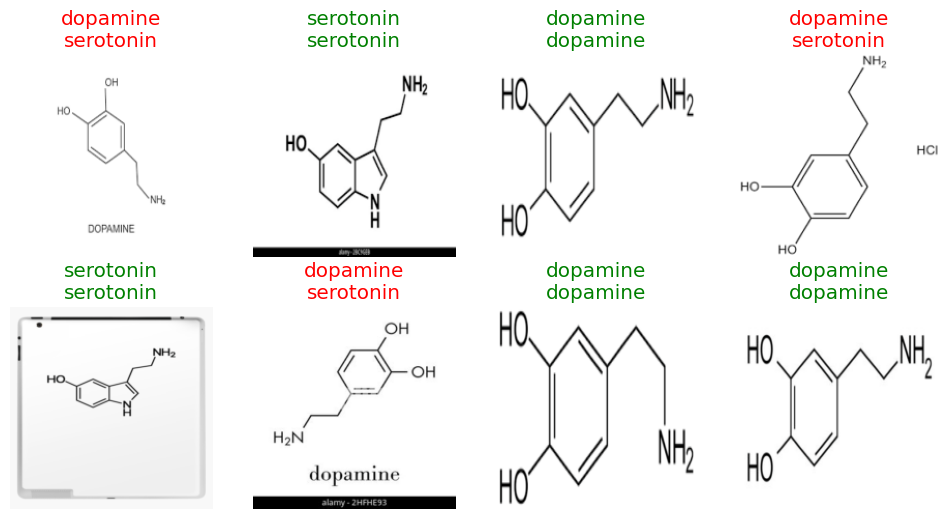

In [81]:
learn.show_results()

In [18]:
learn.predict(files[11])

('dopamine', tensor(0), tensor([1.0000e+00, 4.7982e-12]))

In [19]:
learn.export(f'/content/drive/MyDrive/{folder_id}/molecule_model.pkl')

NameError: name 'folder_id' is not defined

In [ ]:
learn = load_learner(f'/content/drive/MyDrive/{folder_id}/molecule_model.pkl')

In [ ]:
!pip install gradio

In [ ]:
img = PILImage.create(files[0])
img.thumbnail((192,192))
img


In [ ]:
molecules = ('dopamine', 'serotonin')

def classify(img):
  prd,idx,probs = learn.predict(img)
  return dict(zip(molecules, map(float, probs)))

classify(img)

In [ ]:

import gradio as gr
image = gr.Image()
label = gr.Label()
examples = [files[0], files[21]]

intf = gr.Interface(fn=classify, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)